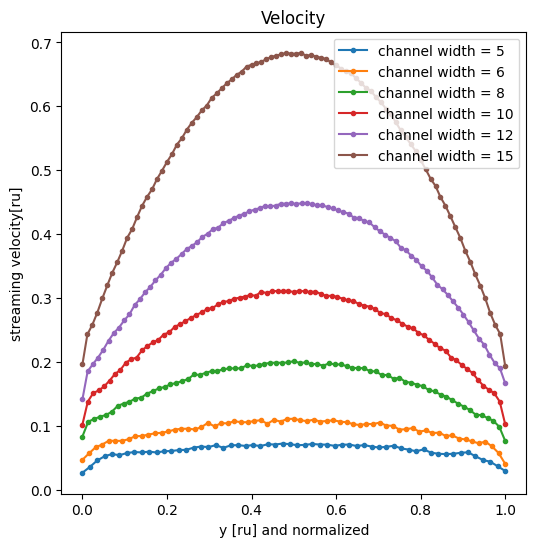

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

#Function to somewhat clean up the spiking action going on at the walls, only used for velocity
def cleanSpikes(arr,diff,replace):
    newz = []
    for i,coord in enumerate(arr):
        if(i==0):
            newz.append(coord)
            continue
        if(np.abs(coord-newz[-1]) > diff or coord<0):
            newz.append(replace)
        else: newz.append(coord)
    return newz

def getTable(file):
    table = pd.read_csv(file,delimiter=" ",header=None,names=["pos_z","density","velocity","temperature"])
    wall_mask = table["density"] > 0.07
    table["pos_z"] = table["pos_z"][wall_mask]
    table["density"] = table["density"][wall_mask]
    table["velocity"] = table["velocity"][wall_mask]
    table["temperature"] = table["temperature"][wall_mask]

    table["pos_z"] =  table["pos_z"] - table["pos_z"].min()
    return table

def plotAll(ax,table,lbl):
    ax[0].plot(table["pos_z"]/table["pos_z"].max(),table["density"],label=lbl,marker=".")
    ax[0].set_title("Density")
    # ax[0].set_ylim(0.4,0.52)
    ax[0].set_ylim(0.01,0.2)
    ax[0].set_xlabel("y [ru] and normalized")
    ax[0].set_ylabel("density [ru]")
    ax[0].legend()

    ax[1].plot(table["pos_z"]/table["pos_z"].max(),table["velocity"],label=lbl,marker=".")
    ax[1].set_title("Velocity")
    ax[1].set_xlabel("y [ru] and normalized")
    ax[1].set_ylabel("streaming velocity[ru]")
    ax[1].legend()

    ax[2].plot(table["pos_z"]/table["pos_z"].max(),table["temperature"],label=lbl,marker=".")
    ax[2].set_title("Temperature")
    ax[2].set_xlabel("y [ru] and normalized")
    ax[2].set_ylabel("temperature [ru]")
    ax[2].legend()

def plotV(table,lbl):
    plt.plot(table["pos_z"]/table["pos_z"].max(),table["velocity"],label=lbl,marker=".")
    plt.title("Velocity")
    plt.xlabel("y [ru] and normalized")
    plt.ylabel("streaming velocity[ru]")
    plt.legend()



def plot(ax,file,lbl,all):
    table = getTable(f'../Tests/{file}.dat')
    if all:
        plotAll(ax,table,lbl)
    else:
        plotV(table,lbl)

all = not True

fig,ax = plt.subplots(1,3 if all else 1,sharex=False,figsize=(15 if all else 6,6))

plot(ax,"WG9","channel width = 5",all)
plot(ax,"WG10","channel width = 6",all)
plot(ax,"WG8","channel width = 8",all)
plot(ax,"WG1","channel width = 10",all)
plot(ax,"WG2","channel width = 12",all)
plot(ax,"WG3","channel width = 15",all)

# plot(ax,"WG1","Pressure=0.01",all)
# plot(ax,"WG4","Pressure=0.03",all)
# plot(ax,"WG5","Pressure=0.05",all)
# plot(ax,"WG6","Pressure=0.08",all)
# plot(ax,"WG7","Pressure=0.1",all)
# plot(ax,"WG11","Pressure=0.12",all)

# plot(ax,"WAu9","channel width = 5",all)
# plot(ax,"WAu10","channel width = 6",all)
# plot(ax,"WAu8","channel width = 8",all)
# plot(ax,"WAu1","channel width = 10",all)
# plot(ax,"WAu2","channel width = 12",all)
# plot(ax,"WAu3","channel width = 15",all)

# plot(ax,"WAu1","Pressure=0.01",all)
# plot(ax,"WAu4","Pressure=0.03",all)
# plot(ax,"WAu5","Pressure=0.05",all)
# plot(ax,"WAu6","Pressure=0.08",all)
# plot(ax,"WAu7","Pressure=0.1",all)
# plot(ax,"WAu11","Pressure=0.12",all)


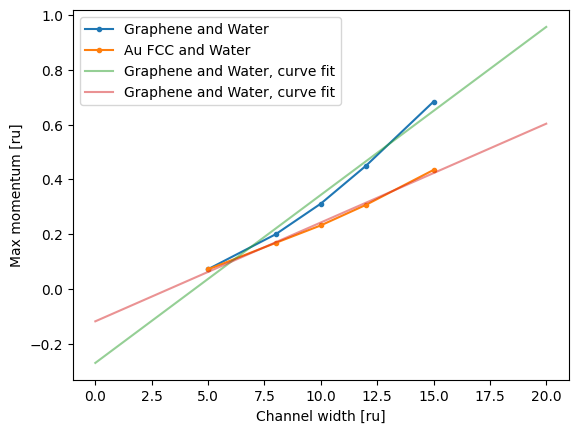

In [2]:
def line(x,a,b):
    return x*a+b

Ps = [0.01,0.03,0.05,0.08,0.1]
cw = [5,8,10,12,15]
Xs = [Ps,cw,Ps,cw]

WG = [[2.1,2.13,2.18,2.20,2.21],[1.4,2.06,2.1,2.24,2.28],[0.31131759278807436, 0.8988376391351598, 1.4062712790627998, 2.059730121914258, 2.4366918029284195],[0.07203906560528353, 0.19964487334349706, 0.31131759278807436, 0.44937891966221666, 0.6838102892488215]]
WAu = [[6.55,7.5,8.3,9.48,10.42],[4.33,6.2,6.55,7.06,7.97],[0.2319576304712444, 0.7007874866292471, 1.1557258634697893, 1.8222262396685587, 2.246056301560237],[0.07131828369485453, 0.16805835417993453, 0.2319576304712444, 0.30678322299089905, 0.4343947797775279]]

xlabel = ["Pressure [ru]","Channel width [ru]","Pressure [ru]","Channel width [ru]"]

show = 3

parWG,_ = curve_fit(line,Xs[show],WG[show])
parWAu,_ = curve_fit(line,Xs[show],WAu[show])

XWG = np.linspace(0,Xs[show][-1]+Xs[show][0])
XWAu = np.linspace(0,Xs[show][-1]+Xs[show][0])

plt.plot(Xs[show],WG[show],label="Graphene and Water",marker=".")
plt.plot(Xs[show],WAu[show],label="Au FCC and Water",marker=".")

plt.plot(XWG,line(XWG,parWG[0],parWG[1]),label="Graphene and Water, curve fit",alpha=.5)
plt.plot(XWAu,line(XWAu,parWAu[0],parWAu[1]),label="Graphene and Water, curve fit",alpha=.5)

plt.xlabel(xlabel[show])
plt.ylabel("Slip length [ru]" if show<2 else "Max momentum [ru]")
plt.legend()

mu: 5.497908301941182 ru
L_S: 2.0953361618187656 ru
T: 706.4917037007848 K -> 433.4917037007848 C


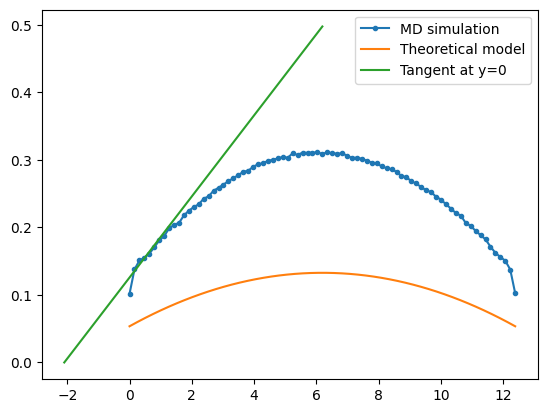

In [5]:
def parabola(x,a,b,c):
    return x**2*a+x*b+c

def findSlipLengthCF(x,y):
    vars,cov=curve_fit(parabola,x.dropna(),y.dropna(),absolute_sigma=True)
    L_s = -vars[2]/vars[1]
    return np.abs(L_s),vars[0],vars[1],vars[2]

def momentumPFlowEquation(y,rho,mu,P,A,B):
    return y**2/(rho*mu*2)*P-y*A-B

def neumannSlip(Ls,channel_width,rho,mu,P):
    A = (P*channel_width)/(rho*mu*2)
    B = Ls*A
    return A,B


def plotModel(file,P,rho,mu,tanget):
    data = getTable(f'../Tests/{file}.dat')
    cw = data["pos_z"].max() - data["pos_z"].min()
    L_s,a,b,c = findSlipLengthCF(data["pos_z"],data["velocity"])
    T = eps_FF/kb * data["temperature"].mean()

    A,B = neumannSlip(L_s,cw,rho,mu,P)

    Y = np.linspace(0,cw)

    plt.plot(data["pos_z"],data["velocity"],label="MD simulation",marker=".")
    plt.plot(Y,momentumPFlowEquation(Y,rho,mu,P,A,B),label="Theoretical model")
    if tanget:
        Y_t = np.linspace(-L_s,cw/2)
        plt.plot(Y_t,Y_t*b+c,label="Tangent at y=0")
    plt.legend()
    print(f'L_S: {L_s} ru')
    print(f'T: {T} K -> {T-273} C')
    return L_s



sys = "WG"
round = 1
file = f'{sys}{round}'

P = -0.01
rho = 0.44 if sys == "WG" else 0.11

eps_FF = 30.67*1.6*10**(-22) #kg m^2/s^2
sig_FF = 2.735*10**(-10) #m
m = 2.988*10**(-26) #kg
kb = 1.380649*10**(-23) #m^2 kg/(s^2 K)

mu_raw_kin = 0.3643*10**(-6) #m^2/s
mu_raw_dyn = 0.89*10**(-3)  #kg/(m s)

# mu = mu_raw_kin/(sig_FF*np.sqrt(eps_FF/m))
mu = mu_raw_dyn/(np.sqrt(m*eps_FF)/sig_FF**2)
# mu = 5.5

print(f'mu: {mu} ru')

L_s = plotModel(file,P,rho,mu,True)


In [33]:
eps_FF = 120*kb #kg m^2/s^2
sig_FF = 0.34*10**(-9) #m
m = 6.633*10**(-26) #kg
kb = 1.380649*10**(-23) #m^2 kg/(s^2 K)

mu_raw_kin = 0.3643*10**(-6) #m^2/s
mu_raw_dyn = 8.1*10**(-3)  #kg/(m s)

# mu = mu_raw_kin/(sig_FF*np.sqrt(eps_FF/m))
mu = mu_raw_dyn/(np.sqrt(m*eps_FF)/sig_FF**2)
# mu = 5.5

print(f'mu: {mu} ru')

mu: 89.32141408458911 ru
